# 00. Table of contents

 - Importing libraries
 - Importing Dataset
 - Creating a histogram of the “order_hour_of_day” column
 - Creating a bar chart from the “loyalty_flag” column
 - Checking whether there’s a difference in expenditure (prices) depending on the hour of the day (on a sample)
 - EDA on customer demographics: line chart exploring the connections between age and number of dependents (on a sample)
 - Creating scatterplot: connection between age and spending power


# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing dataset

In [3]:
path = r'C:\Users\viki\Documents\Data Analytics\Immersion\Achievement 4\Instacart Basket Analysis'

In [3]:
ords_prods_cust_merged= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

# 03. Further steps in the 2nd part of the task


### Step 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

<font color=blue>please see separate Notebook for the "do along"</font>

### Step 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

    In a markdown cell beneath your histogram, describe what the histogram demonstrates.


In [4]:
ords_prods_cust_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,Income
0,2539329,1,1,2,8,11.0,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


Text(0, 0.5, 'Number of orders')

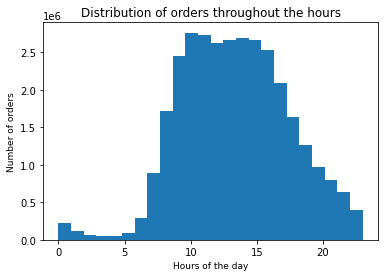

In [5]:
# creating histogram with 24 bins
q1_hist_hours_of_the_day = ords_prods_cust_merged['order_hour_of_day'].plot.hist(bins = 24)
plt.title ('Distribution of orders throughout the hours')
plt.xlabel("Hours of the day", fontsize=9)
plt.ylabel("Number of orders",fontsize=9)

<font color=blue>The histogram shows in an hourly (24 bins) breakdown the frequency of the orders. We can see that most of the orders take place between 9-17 during the day and the least orders are between 2-5 AM </font>

In [6]:
# exporting histogram
q1_hist_hours_of_the_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'q1_hist_hours_of_the_day.png'))

### Step 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

Text(0, 0.5, 'Number of customers')

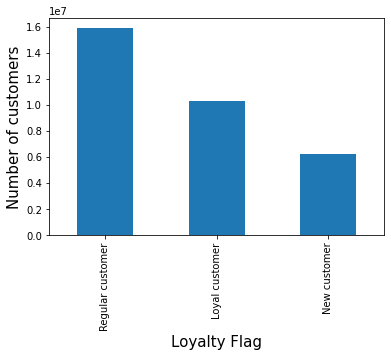

In [7]:
# creating bar chart
bar_loyalty_flag = ords_prods_cust_merged['loyalty_flag'].value_counts().plot.bar()
plt.xlabel("Loyalty Flag", fontsize=15)
plt.ylabel("Number of customers",fontsize=15)

In [8]:
# exporting bar chart
bar_loyalty_flag .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

### Step 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [9]:
# creating seed for sampling
np.random.seed(4)

In [10]:
# creating a list holding True/False values to the test np.random.rand()<= 0.7
dev = np.random.rand(len(ords_prods_cust_merged)) <= 0.7

In [11]:
# store 70 % of the sample in df big - didnt execute to save memory
# len_big = len(ords_prods_cust_merged[dev])

In [12]:
# store 30 % of the sample in the df small
small = ords_prods_cust_merged[~dev]
dev = None # Let the garbage collector dispose dev

In [13]:
# checking if the split was working
# len(ords_prods_cust_merged)

In [17]:
#disposing initial df from memory
ords_prods_cust_merged= None

In [5]:
# creating subset with relevant columns for the line chart
df_2 = small[['order_hour_of_day','prices']]

Text(0, 0.5, 'Prices in $')

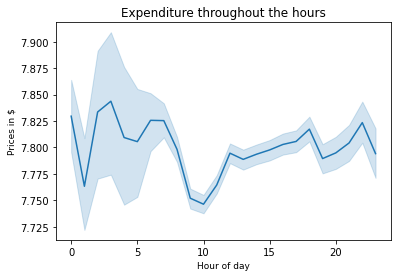

In [6]:
# creating line chart
q2_line_hour_vs_prices = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.title('Expenditure throughout the hours')
plt.xlabel('Hour of day', fontsize=9)
plt.ylabel('Prices in $',fontsize=9)

In [7]:
# exporting line chart
q2_line_hour_vs_prices .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'q2_line_hour_vs_prices.png'))

### Step 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:

    In a markdown cell beneath your line chart, describe what the line chart shows.


In [ ]:
df_3 = small[['Age','n_dependants', 'Income']]

In [ ]:
# creating line chart
line_age_vs_family_status = sns.lineplot(data = df_3, x = 'Age',y = 'n_dependants')
plt.xlabel("Age", fontsize=15)
plt.ylabel("n_dependants",fontsize=15)

<font color=blue> No real connection can be seen between age and number of dependants </font>

In [ ]:
# exporting line chart
line_age_vs_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_vs_family_status.png'))

### Step 7. You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

    In a markdown cell beneath your scatterplot, describe what the scatterplot shows.


In [ ]:
# creating scatterpot
scatterplot_age_vs_income = sns.scatterplot(x = 'Age', y = 'Income',data = df_3)


<font color=blue> We can see that very high income (>400k) individuals are all older than 40. The spending power of people under 40 is lower than above 40. </font>

In [ ]:
#exporting scatterplot
scatterplot_age_vs_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_vs_income.png'))

### Step 8. Export your visualizations as “.png” files in your relevant project folder.

<font color=blue> Already exported all the charts at the end of each step </font>

# 03. Exporting sample df
#### maybe it will be needed for the final task for peparing further charts etc

In [ ]:
small.to_pickle(os.path.join(path, '02 Data','Prepared Data', '30percent_sample_ords_prods_cust_merged.pkl'))
